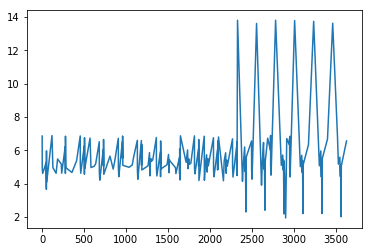

0.07131057268722467


,TIME,Value
count,259.000000,259.000000
mean,2007.266409,21543.854672
std,4.296482,138768.701894
min,2000.000000,7.000000
25%,2004.000000,131.500000
50%,2007.000000,174.300000
75%,2011.000000,375.500000
max,2015.000000,987406.000000


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('./eurostat/Freshwater_Resources_Data.csv',encoding='latin-1')
#data
data.Value = data.Value.apply(lambda x: 'NaN' if x==':' else x)
data.Value = data.Value.apply(pd.to_numeric,errors='coerce')
data_clean =data.query('Value>0')
plt.plot(np.log(data_clean.Value))
plt.show()
print(len(data_clean)/len(data))
data_max = data_clean.query('Value>10000')
data_clean.describe()